<h1>Business Case: LoanTap Logistic Regression</h1>

- LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

- The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

    LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

     - Personal Loan
     - EMI Free Loan
     - Personal Overdraft
     - Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

<h3>Problem Statement:</h3>
<p>Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?</p>

<h3>Dictionary :</h3>

1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. **loan_status: Current status of the loan.**
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records for borrower.
27. Address: Borrower's location.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.metrics import recall_score, precision_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df= pd.read_csv("logistic_regression.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 396030
Number of columns: 27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


### Analysis till now: 
- There are total 396030 rows but in some columns have missing values
- Maximum Loan amount is 4000 and min is 500, 75% of loan amount is equal or below 2000
- Most of the time loan term is 36 months 
- Maximum interest rate is 30.99 and minimum is 5.32
- Most of the loan status is Fully paid
- There is difference between mean and median so outliers may present in data
- Most of the people have home ownership status as Mortage
- Most of the people are teacher in data

In [7]:
# no. of Unique values in each column
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [8]:
# checking duplicate data points
df.duplicated().sum()

0

In [9]:
# Checking the distribution of target variable loan_status
ls= df["loan_status"].value_counts()
ls

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

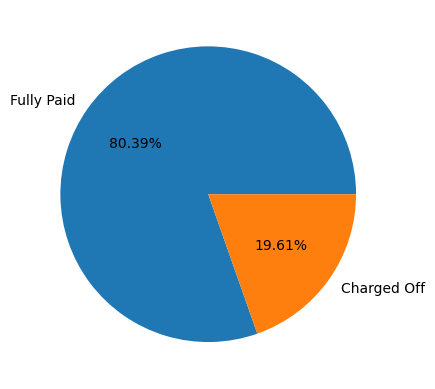

In [10]:
plt.pie(ls, labels= ls.index, autopct='%.2f%%' )
plt.show()

- **There are almost 20% defaulters**

In [11]:
df["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

- **80.39% loan are fully paid and 19.61% loan are charged off**

In [12]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


- Average 15126 amount is charged off
- 75% of the loan_amount is less than or equal to 2000

In [13]:
# checking distribution of homeownership column
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

- The majority of people have home ownership as Mortgage and Rent.
- as we can see other , none and any have almost same meaning so we can merge them as single entity

In [14]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [15]:
### Coverting string to date-time format.
df['issue_d'] = pd.to_datetime(df['issue_d'], format= "mixed")
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format="mixed")

In [16]:
# checking distribution of grade
df["grade"].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

- mostly there are grade B loan type

In [17]:
# checking distribution of "title"
df["title"].value_counts()[:20]

title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: count, dtype: int64

- In above counts we can see there are some case issue
- `"Debt Consolidation Loan" and "Debt Consolidation"` ,<br>
  `"consolidation loan" and "consolidation"`, <br>
  `"credit card refinance" and "credit card refinancing"` are same we can combine them

In [18]:
df['title'] = df.title.str.lower()

In [19]:
df["title"].value_counts()[:20]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
Name: count, dtype: int64

In [20]:
df.loc[(df["title"] == 'consolidation') | (df["title"] == 'consolidate'), 'title'] = 'consolidation loan'
df.loc[(df["title"] == "credit card refinance"), 'title'] = 'credit card refinancing'
df.loc[(df["title"] == "debt consolidation"), 'title'] = 'debt consolidation loan'

In [21]:
df["title"].value_counts()[:20]

title
debt consolidation loan      171621
credit card refinancing       53613
home improvement              17117
other                         12993
consolidation loan             8998
major purchase                 4998
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
vacation                       1866
moving and relocation          1693
personal                       1465
home buying                    1196
loan                           1150
payoff                         1035
credit cards                   1030
freedom                         934
Name: count, dtype: int64

### Visual Analysis: 

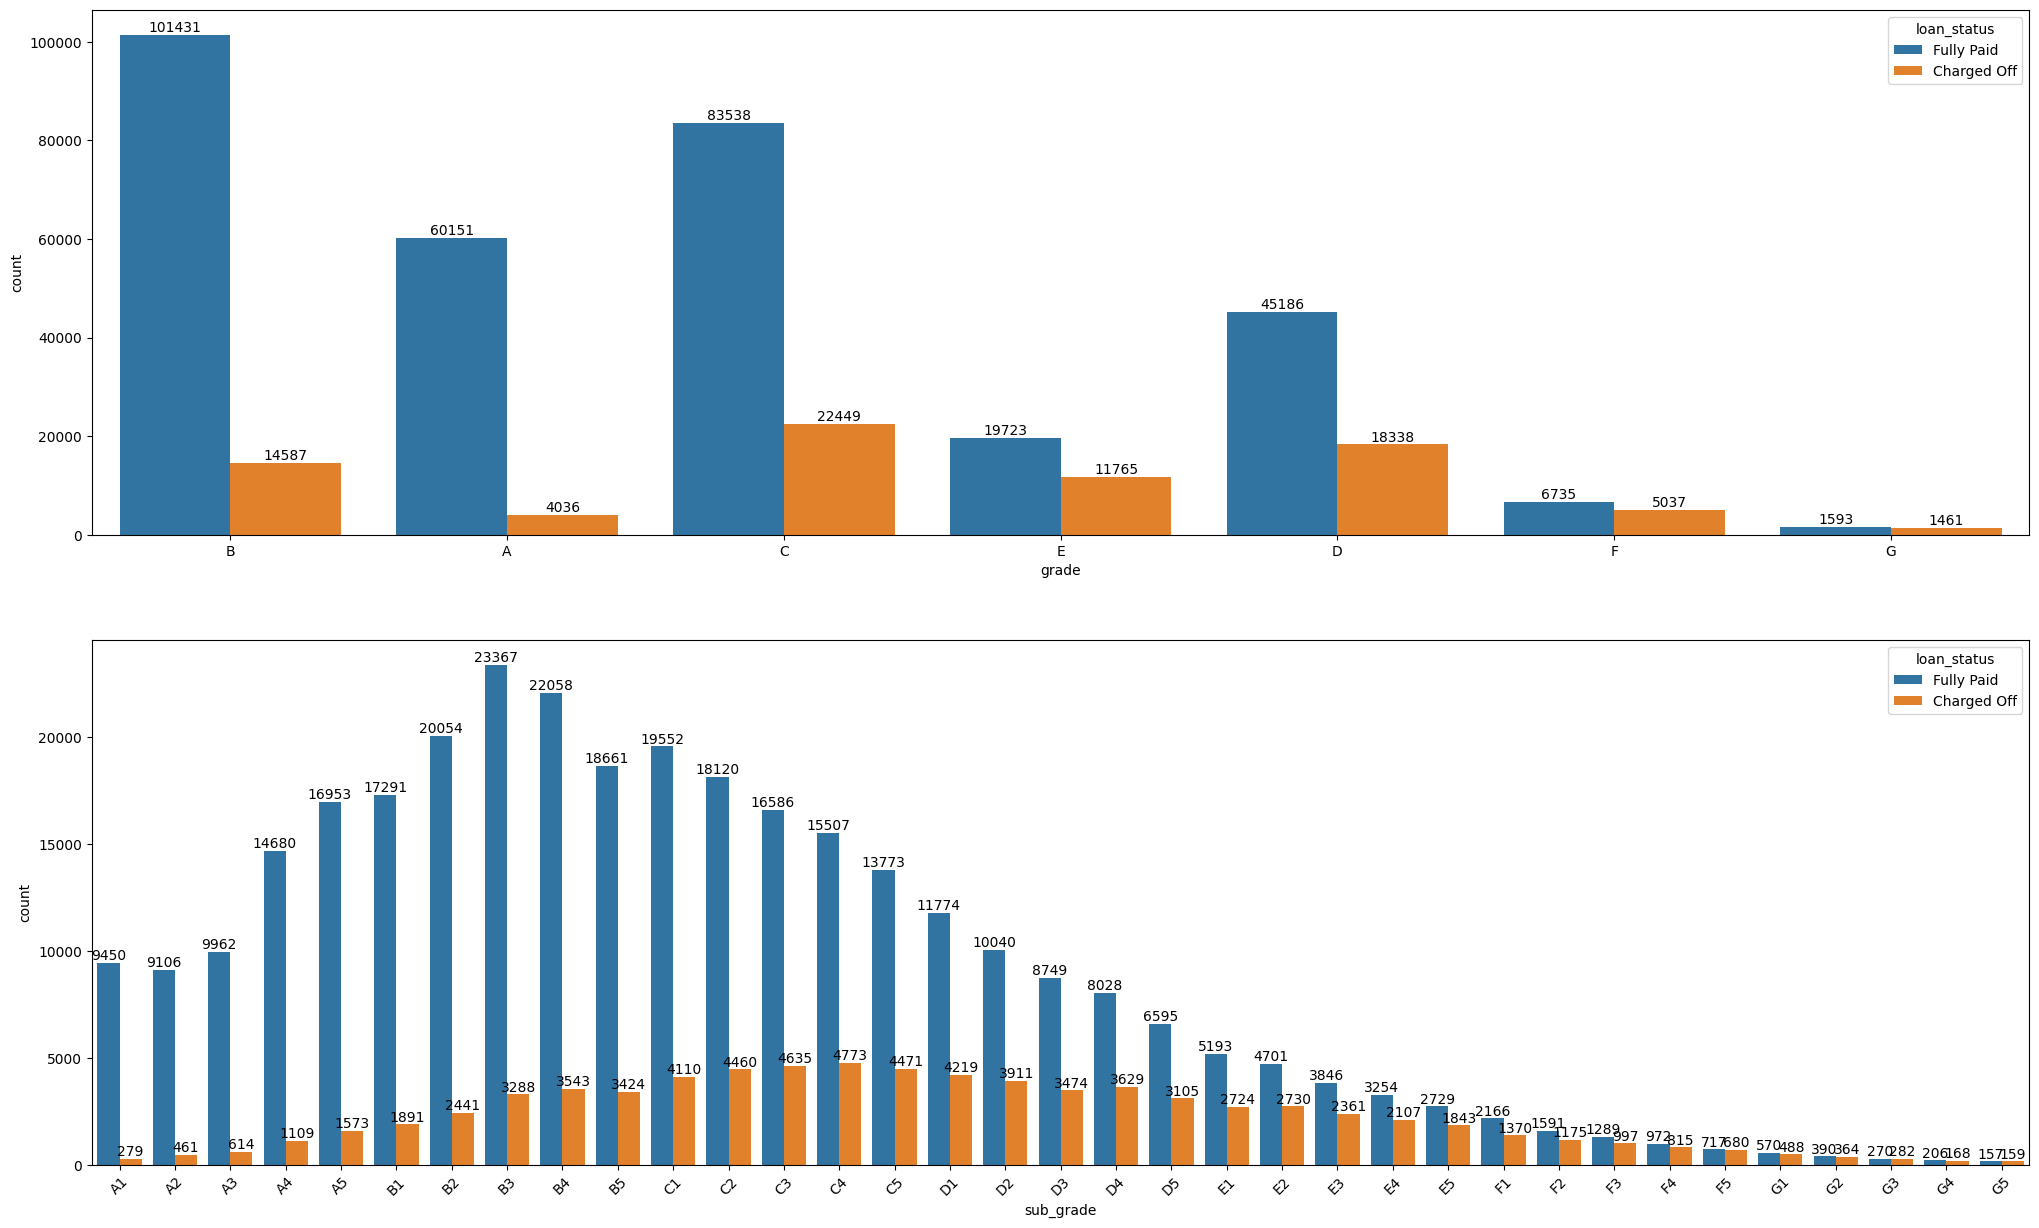

In [22]:
# Checking "grade" distribution with respect to loan status

plt.figure(figsize=(25,15))

plt.subplot(2,1,1)
# plt.subplots_adjust(wspace= 0.2)
label=sns.countplot(df, x= "grade", hue="loan_status")
for i in label.containers:
  label.bar_label(i)

plt.subplot(2,1,2)
label1= sns.countplot(df, x= "sub_grade", hue= "loan_status", order=sorted(df["sub_grade"].unique()))
for i in label1.containers:
  label1.bar_label(i)
plt.xticks(rotation=45)
plt.show()

- grade B with sub_grade B3 has highest full paid loan
- as we can see grade A type loan have less charged off persons of 

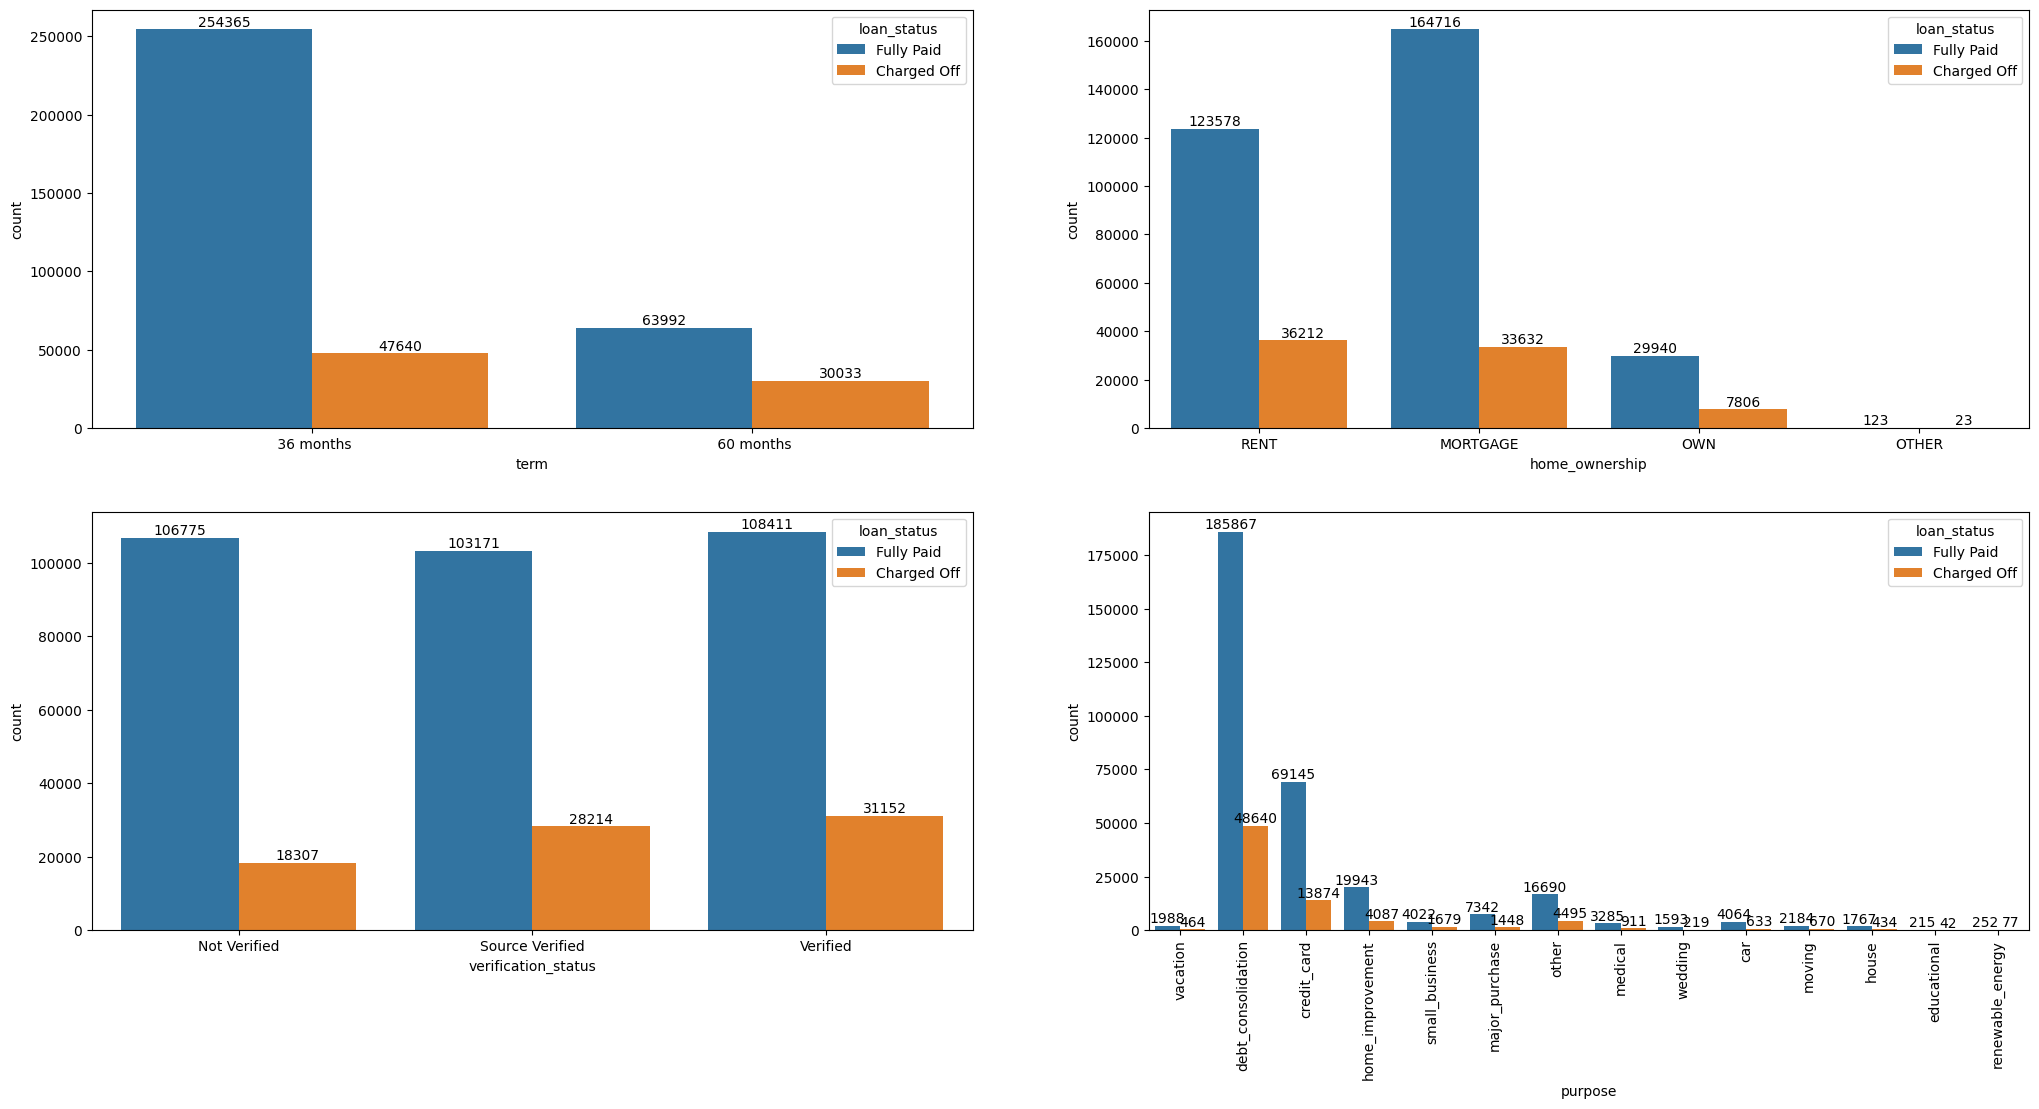

In [23]:
# Checking counts of loan paid and charged of with respect to diffrent features

plt.figure(figsize=(25,25))

plt.subplot(4, 2, 1)
lb1= sns.countplot(x='term', data=df, hue='loan_status')
for i in lb1.containers:
  lb1.bar_label(i)

plt.subplot(4, 2, 2)
lb2= sns.countplot(x='home_ownership', data=df, hue='loan_status')
for i in lb2.containers:
  lb2.bar_label(i)


plt.subplot(4, 2, 3)
lb3= sns.countplot(x='verification_status', data=df, hue='loan_status')
for i in lb3.containers:
  lb3.bar_label(i)

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for i in g.containers:
  g.bar_label(i)

plt.show()

- people with 36 months loan term are most likely to fully pay the loan.
- people with home ownership as Mortage are most likely pay the laon.
- people with debt consolidation purpose are most likely to pay the loan.

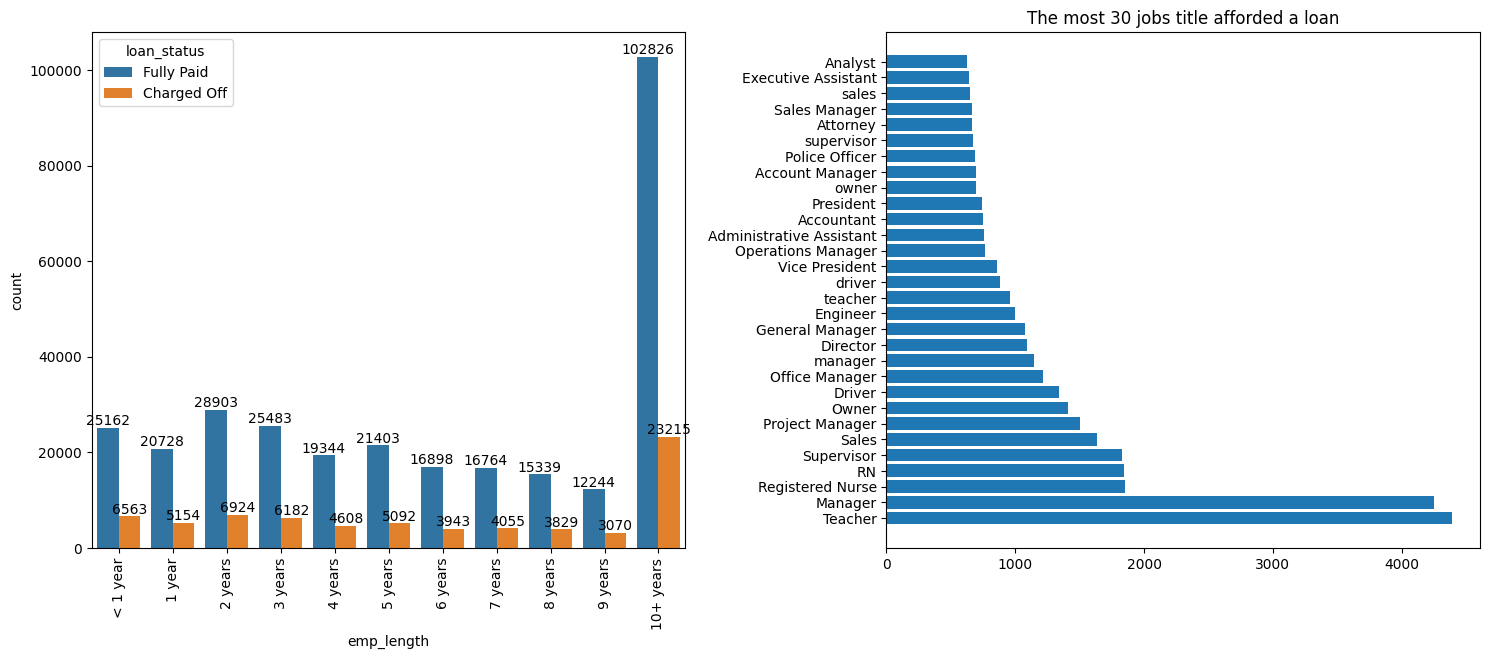

In [24]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
for i in g.containers:
  g.bar_label(i)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

- Manager and Teacher are the most afforded loan job titles.

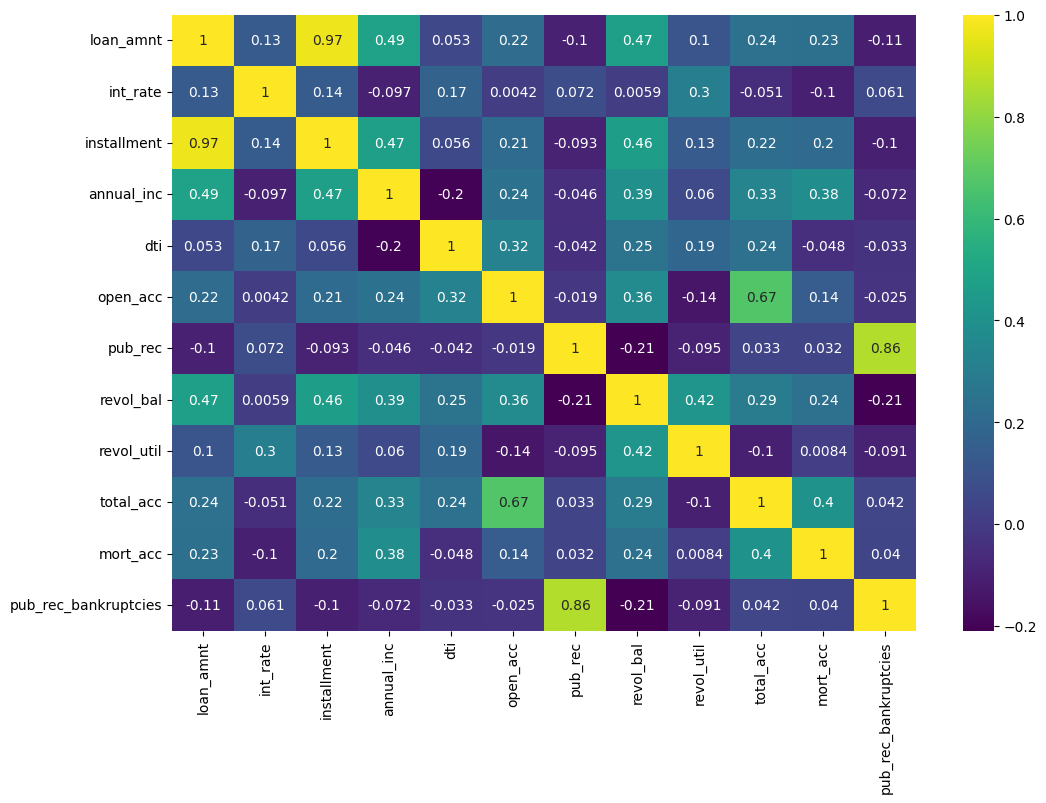

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='viridis')
plt.show()

- We noticed almost perfect correlation between "loan_amnt" the "installment" feature.
- So, we can drop either one of those columns.

In [26]:
# droping "installment" feature
df.drop(columns=['installment'], axis=1, inplace=True)

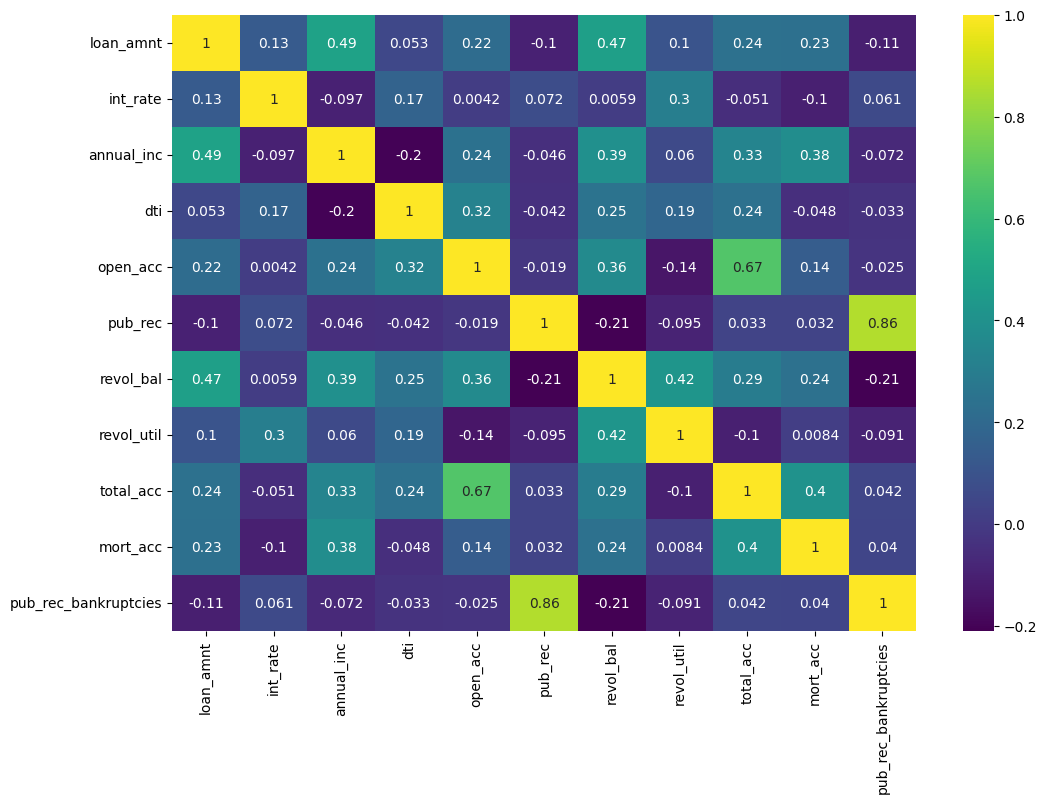

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='viridis')
plt.show()

In [28]:
df.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified


In [29]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [30]:
df["mort_acc"].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [31]:
df["pub_rec"].value_counts()

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

### Feature Engineering -

In [32]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    else:
        return 1


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    else:
        return 1

In [33]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

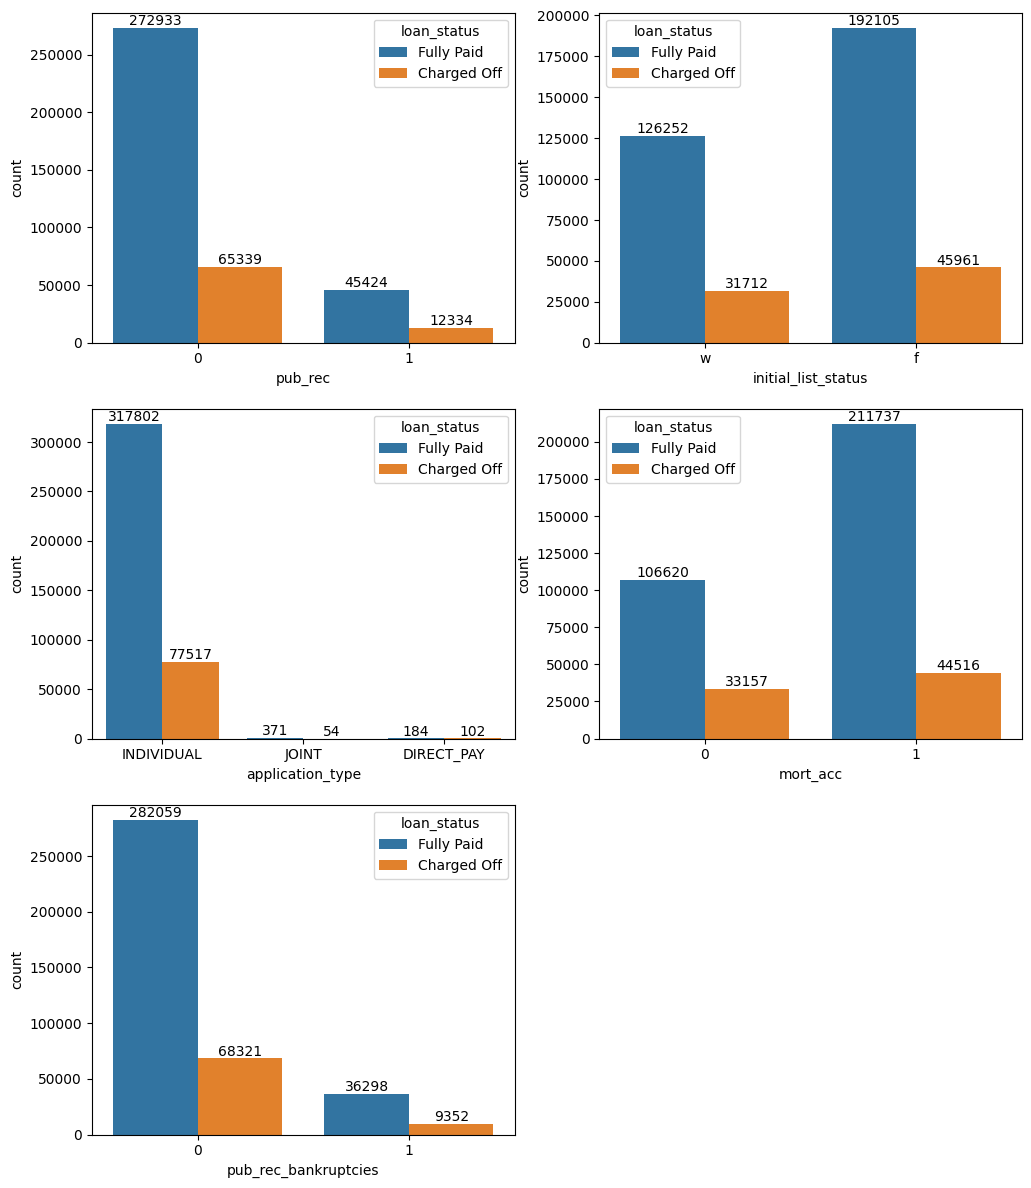

In [34]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
lb1=sns.countplot(x='pub_rec', data=df, hue='loan_status')
for i in lb1.containers:
  lb1.bar_label(i)

plt.subplot(6, 2, 2)
lb2=sns.countplot(x='initial_list_status', data=df, hue='loan_status')
for i in lb2.containers:
  lb2.bar_label(i)

plt.subplot(6, 2, 3)
lb3=sns.countplot(x='application_type', data=df, hue='loan_status')
for i in lb3.containers:
  lb3.bar_label(i)

plt.subplot(6, 2, 4)
lb4=sns.countplot(x='mort_acc', data=df, hue='loan_status')
for i in lb4.containers:
  lb4.bar_label(i)

plt.subplot(6, 2, 5)
lb5=sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')
for i in lb5.containers:
  lb5.bar_label(i)

plt.show()

In [35]:
# Mapping of target variable -
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

**chekcing for missing values** 

In [36]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [37]:
val= np.round((df.isna().sum().values/df.shape[0])*100,2)

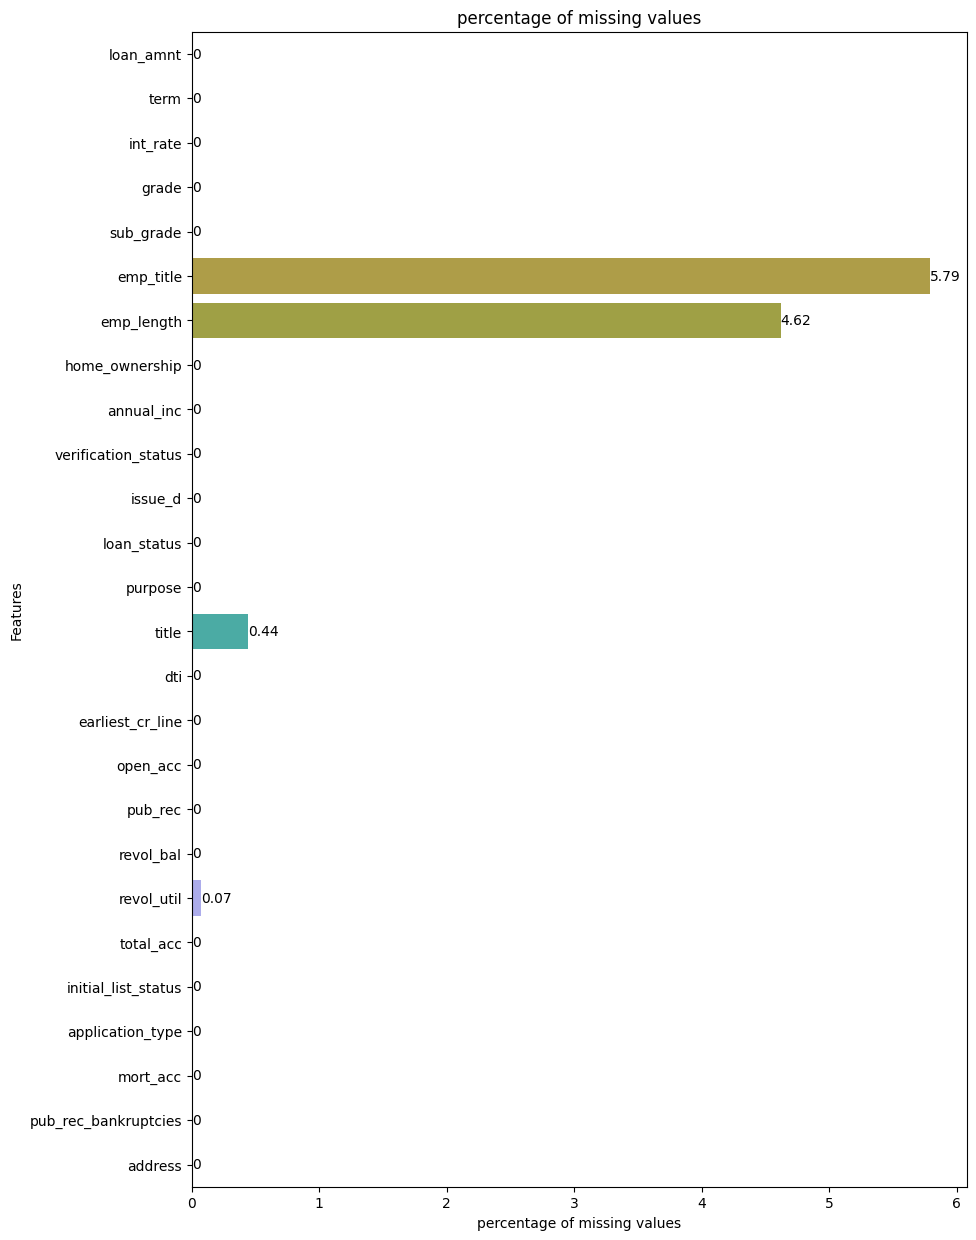

In [38]:
plt.figure(figsize=(10,15))
label= sns.barplot(y= df.isna().sum().index,x= val)
for i in label.containers:
    label.bar_label(i)
plt.title("percentage of missing values")
plt.ylabel("Features")
plt.xlabel("percentage of missing values")
plt.show()

- **job title , Employment length, loan title, number of mortgage accounts and Number of public record bankruptcies columns are showing null values**

In [39]:
# Dropping rows with null values -
df.dropna(inplace=True)

In [40]:
# Remaining no. of rows -
df.shape

(371125, 26)

In [41]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

12

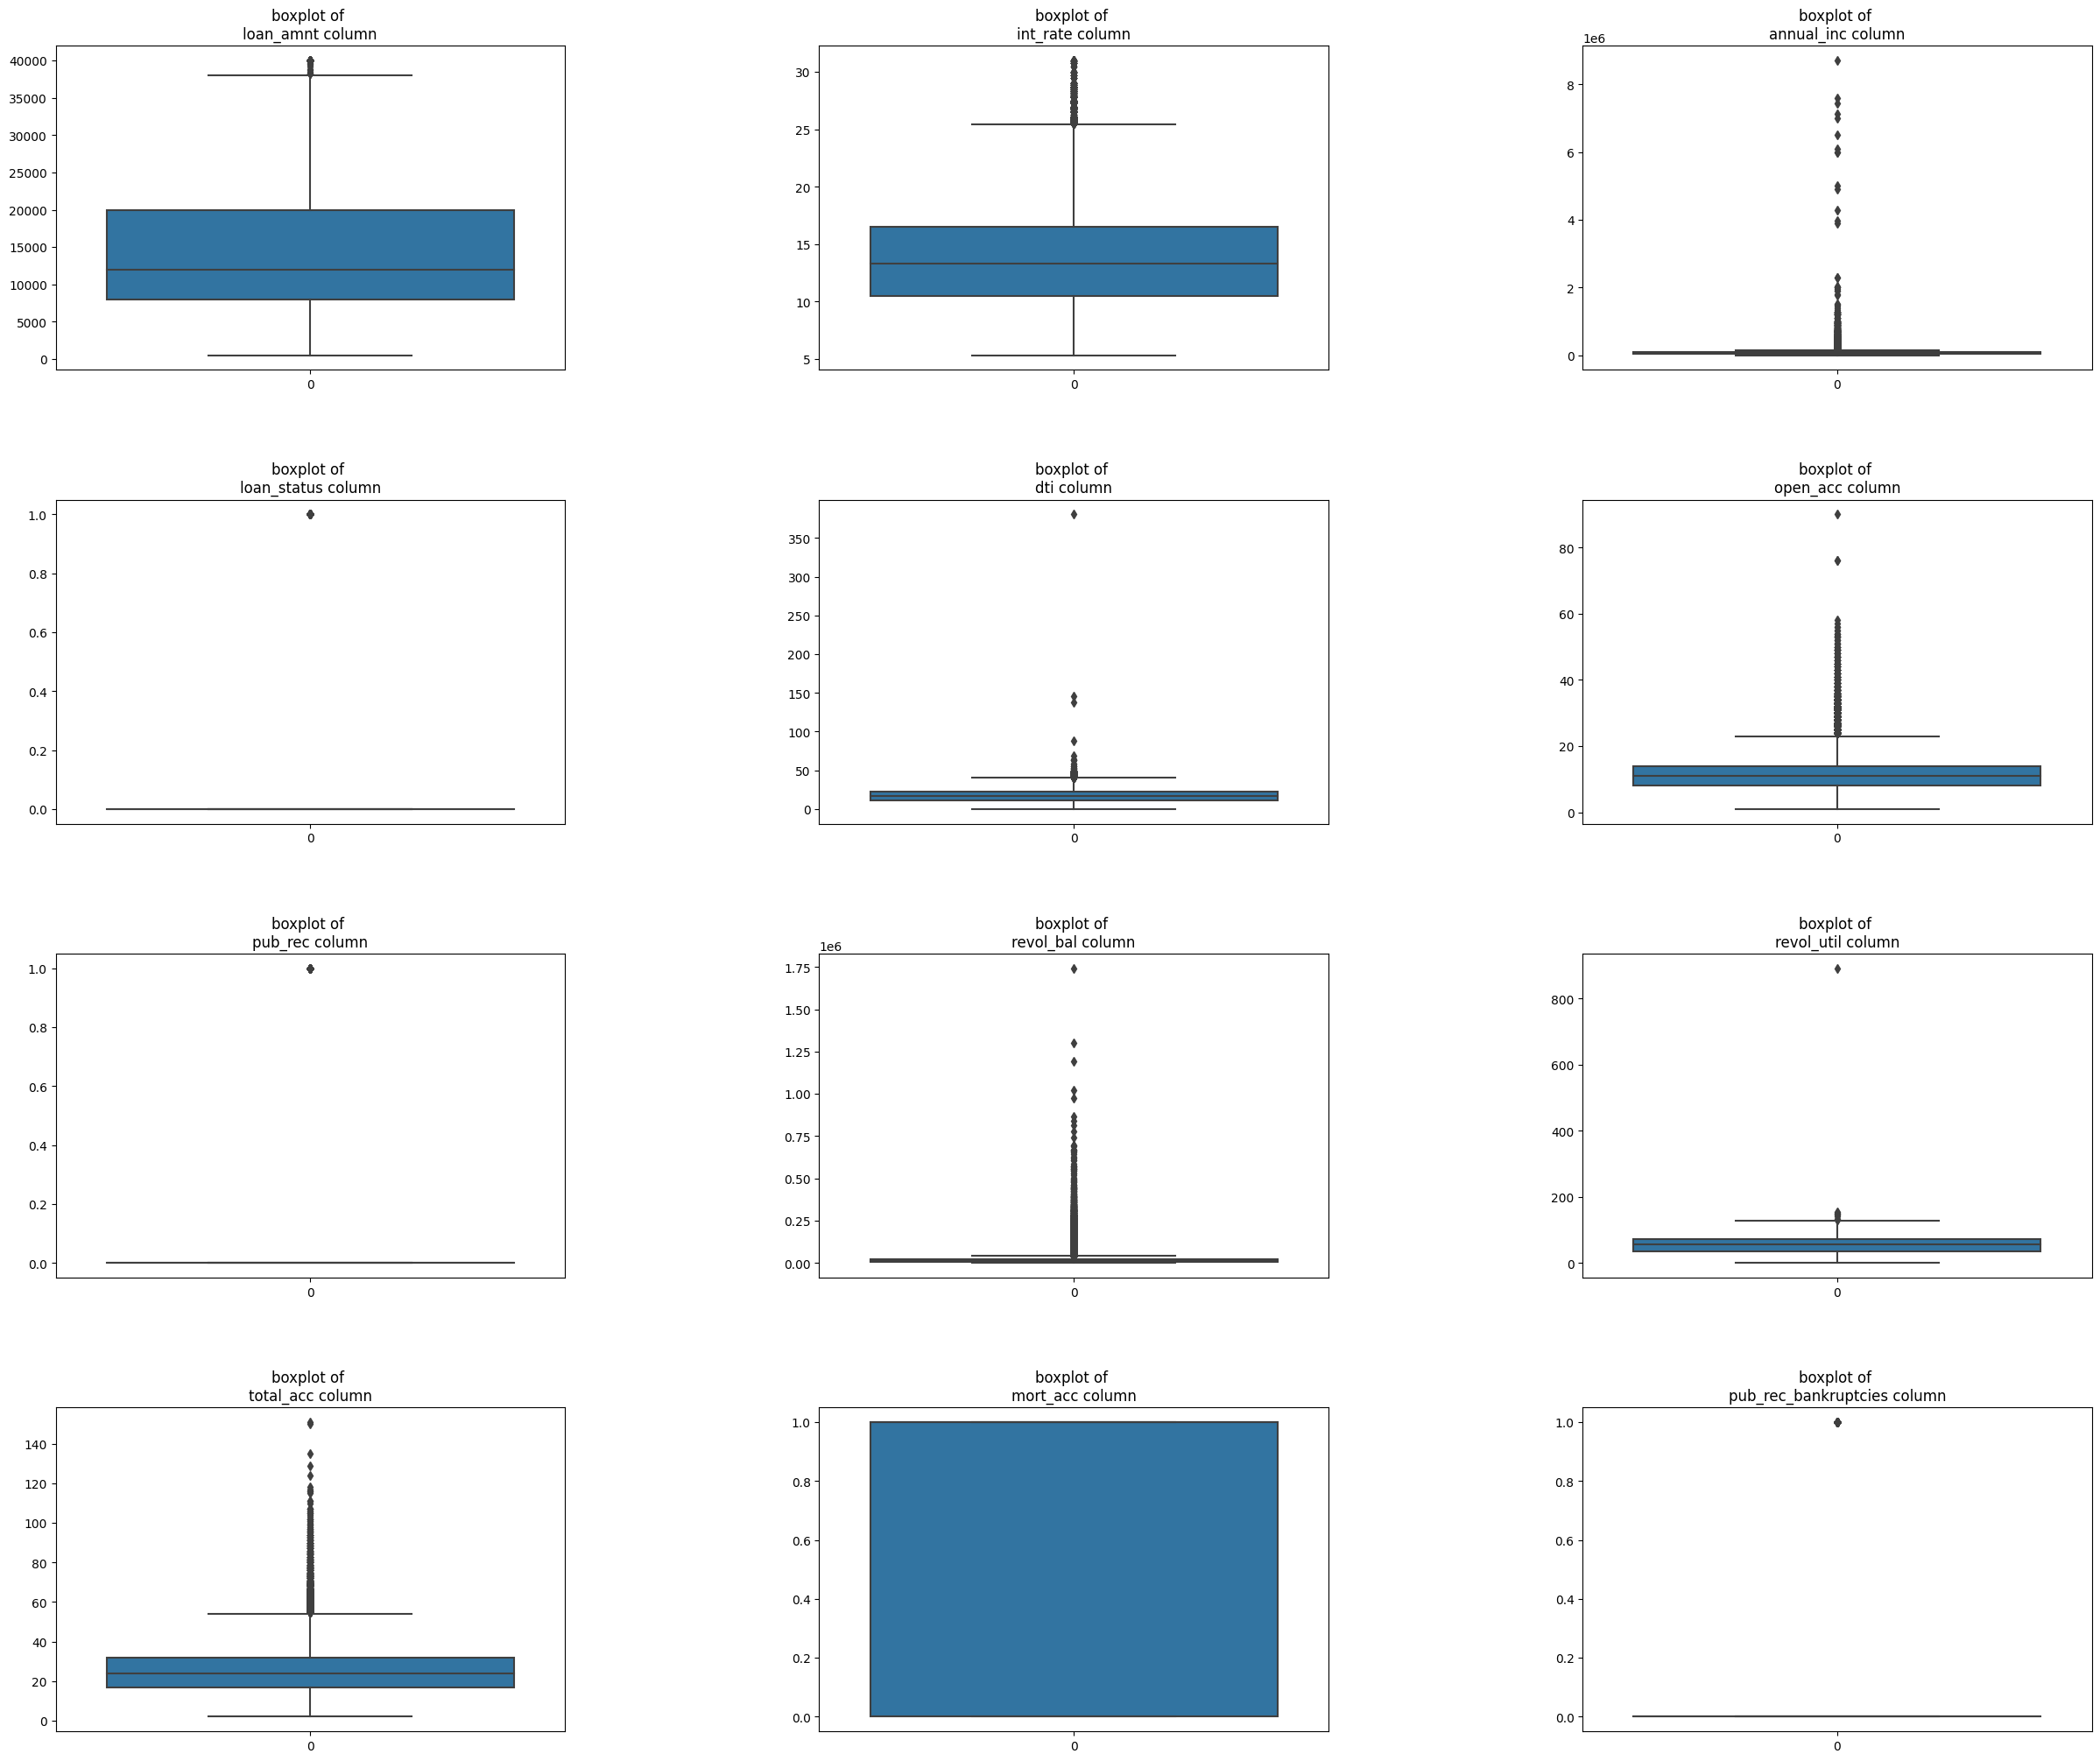

In [42]:
plt.figure(figsize= (30,25))
plt.subplots_adjust(wspace= 0.5)
plt.subplots_adjust(hspace= 0.4)
for i in range(len(num_cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[num_cols[i]] )
    plt.title(f"boxplot of \n{num_cols[i]} column")

In [43]:
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    df_new = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df_new.shape

(371125, 26)

In [44]:
df_new.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [45]:
term_values = {' 36 months': 36, ' 60 months': 60}
df_new['term'] = df_new.term.map(term_values)

In [46]:
# Initial List Status -
df_new['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [47]:
list_status = {'w': 0, 'f': 1}
df_new['initial_list_status'] = df_new.initial_list_status.map(list_status)

In [48]:
df_new.describe(include="object")

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,title,application_type,address
count,371125,371125,371125,371125,371125,371125,371125,371125,371125,371125
unique,7,35,172481,11,4,3,14,38697,3,369072
top,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,debt consolidation loan,INDIVIDUAL,USS Johnson\r\nFPO AE 48052
freq,108820,24992,4367,123478,186399,125225,221469,162884,370569,8


In [49]:
df_new["address"].value_counts()[:20]

address
USS Johnson\r\nFPO AE 48052       8
USS Smith\r\nFPO AP 70466         8
USNS Johnson\r\nFPO AE 05113      7
USNV Smith\r\nFPO AE 30723        6
USCGC Smith\r\nFPO AE 70466       6
USCGC Smith\r\nFPO AA 70466       6
USCGC Miller\r\nFPO AA 22690      6
USNV Brown\r\nFPO AA 48052        6
USNV Lewis\r\nFPO AE 29597        5
USCGC Smith\r\nFPO AP 48052       5
USS Brown\r\nFPO AE 30723         5
USNV Brown\r\nFPO AP 00813        5
USNS Miller\r\nFPO AA 30723       5
USCGC Jones\r\nFPO AE 30723       5
USNS Smith\r\nFPO AE 48052        5
USCGC Jones\r\nFPO AE 22690       5
USNV Williams\r\nFPO AA 48052     5
USNV Jones\r\nFPO AP 30723        5
USNS Brown\r\nFPO AA 48052        5
USCGC Williams\r\nFPO AE 00813    5
Name: count, dtype: int64

In [50]:
# fetching only ZIP from address and then drop the remaining details -
df_new['zip_code'] = df_new.address.apply(lambda x: x[-5:])

In [51]:
df_new["zip_code"].value_counts()

zip_code
70466    53370
30723    52991
22690    52935
48052    52420
00813    43142
29597    42846
05113    42749
11650    10286
93700    10274
86630    10112
Name: count, dtype: int64

In [52]:
# Dropping some variables which we can let go for now -
df_new.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

### Encoding the categorical features using target encoder

In [53]:
from category_encoders import TargetEncoder

In [54]:
# cat_data = df_new.select_dtypes(include='object')
# cat_cols = cat_data.columns
# cat_cols

In [55]:
cat_cols= ['grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'zip_code']

In [56]:
encoder= TargetEncoder()
df_new[cat_cols]= encoder.fit_transform(df_new[cat_cols], df_new["loan_status"])

In [57]:
df_new.shape

(371125, 20)

In [58]:
df_new.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,0.121917,0.222221,117000.0,0.144951,0,0.182948,26.24,16.0,0,36369.0,41.8,25.0,0,0.192215,0,0,0.189497
1,8000.0,36,11.99,0.121917,0.166589,65000.0,0.144951,0,0.203880,22.05,17.0,0,20131.0,53.3,27.0,1,0.192215,1,0,0.000000
2,15600.0,36,10.49,0.121917,0.222221,43057.0,0.214382,0,0.162355,12.79,13.0,0,11987.0,92.2,26.0,1,0.192215,0,0,0.000000
3,7200.0,36,6.49,0.059795,0.222221,54000.0,0.144951,0,0.162355,2.60,6.0,0,5472.0,21.5,13.0,1,0.192215,0,0,0.000000
4,24375.0,60,17.27,0.207463,0.166589,55000.0,0.216380,1,0.162355,33.95,13.0,0,24584.0,69.8,43.0,1,0.192215,1,0,1.000000


In [59]:
X = df_new.drop('loan_status', axis=1)
y = df_new['loan_status']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=y, random_state=42)

In [61]:
print(X_train.shape)
print(X_test.shape)

(259787, 19)
(111338, 19)


In [62]:
# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Oversampling with SMOTE to balance the target variable


In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
sm=SMOTE(random_state=42)
X_train_baln, y_train_baln = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_baln == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_baln == 0)}")

Before OverSampling, count of label 1: 49938
Before OverSampling, count of label 0: 209849
After OverSampling, count of label 1: 209849
After OverSampling, count of label 0: 209849


## Logistic Regression

In [65]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_baln, y_train_baln)

LogisticRegression(max_iter=1000)

In [66]:
# accuracy of logreg model
y_pred = logreg.predict(X_test)
print(f'Accuracy of Logistic Regression Classifier on test set: {logreg.score(X_test, y_test)}')

Accuracy of Logistic Regression Classifier on test set: 0.8084212039016329


### Confusion Matrix -

In [67]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[73191 16745]
 [ 4585 16817]]


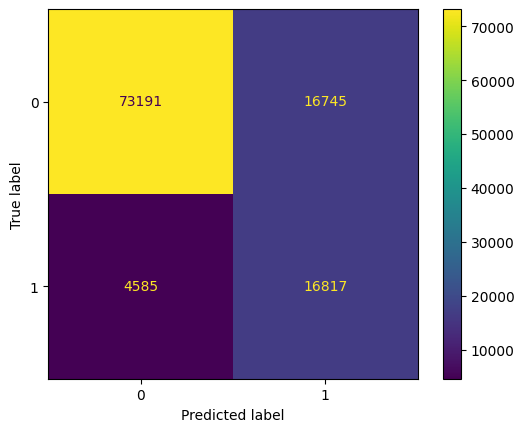

In [68]:
ConfusionMatrixDisplay(confusion_matrix).plot()

plt.show()

In [69]:
recall_score(y_test, y_pred)

0.7857676852630595

In [70]:
precision_score(y_test, y_pred)

0.5010726416780883

In [71]:
f1_score(y_test, y_pred)

0.6119278072920458

### Classification Report -

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     89936
           1       0.50      0.79      0.61     21402

    accuracy                           0.81    111338
   macro avg       0.72      0.80      0.74    111338
weighted avg       0.86      0.81      0.82    111338



- as we can see in above report accuracy is almost 90%
- In confusion matrix we can see False positive is higher i.e. person who fully paid loan but predicted as charged off are high in number
- logreg model has false negative is low means person who fully paid laon but predicted as charged off are lower compare to false positive
- **we are getting high recall value is 0.79 which is good**
- f1_score is 0.61,To increase f1 score we can try different combination of threshold values 
- we are getting good recall score means our model is able to identify 79% of actual defaulters
- precision is low(0.50) it may cause loantap to deny loans to many deserving customers due to low precision (false positives)

### ROC Curve & AUC

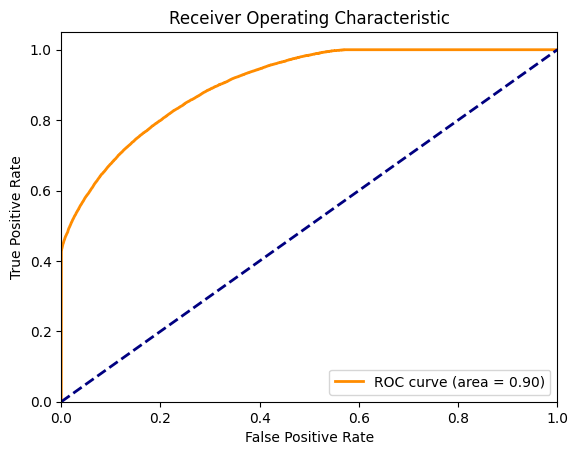

In [73]:
# Predict probabilities in test data
probs = logreg.predict_proba(X_test)[:,1]

# Computing the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
logit_roc_auc = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- We get an AU-ROC value of 90% showing that the model is performing very good
- But F1 score is 0.61 
- there is huge difference between AUC score and F1 score because it is making a poor model on the minority class appear better by focusing more on the performance on the majority class.
- **so we can use Precision and Recall values for every probability instead of TPR and FPR**


In [74]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import auc

### Precision Recall Curve

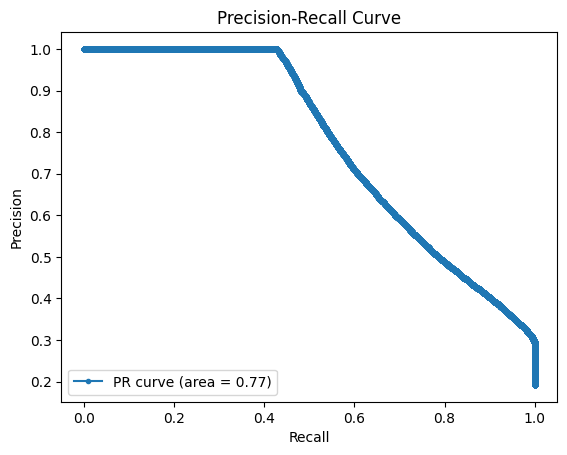

In [75]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = auc(recall, precision)
# auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

- **Now F1 score and AUC is closer than before. It is a decent model as the area is more than 0.5 but there is still scope for improvement.**

### feature importance 

In [76]:
column= ['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code']
X= pd.DataFrame(X_train_baln, columns= column)

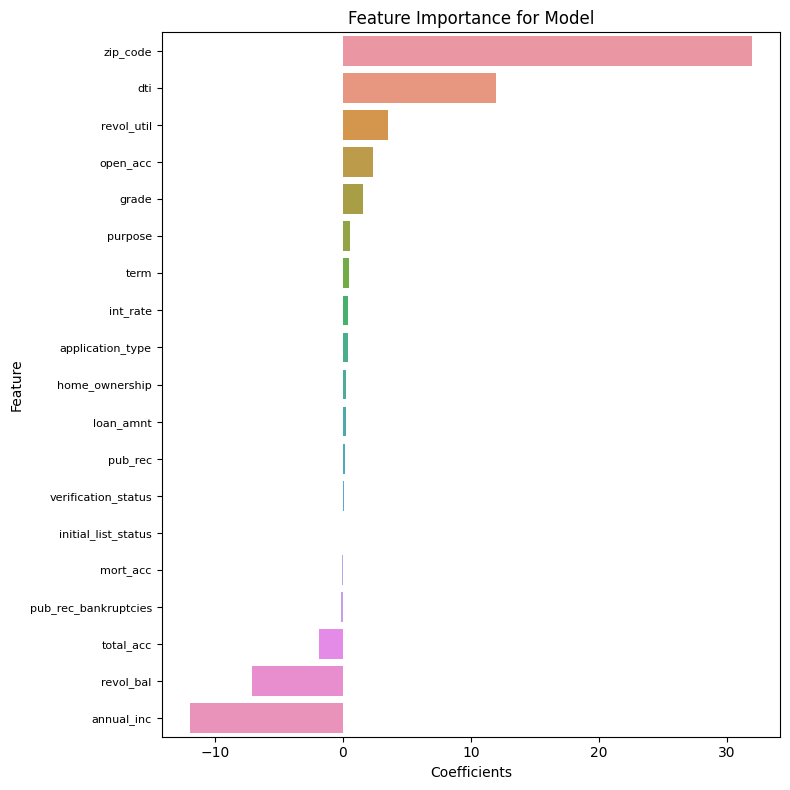

In [77]:
feature_imp = pd.DataFrame({'Columns':X.columns, 'Coefficients':logreg.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

- Model has assigned most importance to "zip_code" followed by "dti", "revol_util", "open_acc" and "grade"
- Negative impact assigned to "annual_inc" follwed by "revol_bal" and "total_acc"

- we are getting good recall score means our model is able to identify 79% of actual defaulters
- precision is low(0.50) it may cause loantap to deny loans to many deserving customers due to low precision (false positives)

## Tradeoff Questions:

- **Q1**. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
- -Ans: Precision score is an indicator of type1 error. Increasing precision score of the model will minimise false positives and ensure that the company is not losing out on the opportunity to finance worthy individuals.
<br>



- **Q2**. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.
- -Ans: Recall score is an indicator of how many actual defaulters are flagged by the model. By increasing the recall score, we can minimise false negatives (type2 error) and ensure that loans are not disbursed to defaulters.

### Questionnaire:

- Q1 What percentage of customers have fully paid their Loan Amount?
ans: 80.39% people
    
    
Comment about the correlation between Loan Amount and Installment features.
ans: correlation between Loan Amount and Installment is high(0.97) This indicates high multicollinearity between these two features so we can remove one of them, installment feature is dropped

The majority of people have home ownership as Mortage.

People with grades ‘A’ are more likely to fully pay their loan. (T/F)
True

Name the top 2 afforded job titles.
ans: Teacher and manager
Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC
Ans: F1 Score

Q. How does the gap in precision and recall affect the bank?
- Recall score: 0.79 and Precision score: 0.50. Which tells us that there are more false positives than the false negatives.
- if recall is low then then some defaulter may get loan approved 
- if precision is low then some good customers may identify as defaulters

Which were the features that heavily affected the outcome?
- Model has assigned most importance to "zip_code" followed by "dti", "revol_util", "open_acc" and "grade"
- Negative impact assigned to "annual_inc" follwed by "revol_bal" and "total_acc"

Will the results be affected by geographical location? (Yes/No)
- Yes, zip code has significant impact on the outcome.

### Insight: 
- The loan_status (target variable) is impacted by categorical attributes. 
- It has been noted that the percentage of defaulters is significantly higher for longer (60-month) term loans. 
- people with no record of bankruptcy are most likely paying full loan.

- The loan_status (target variable) is also influenced by numerical attributes. It is evident that defaulters tend to have higher mean values for loan_amnt, int_rate, dti, open_acc, and revol_util. Conversely, defaulters tend to have lower mean annual incomes.

- A Logistic Regression model, trained after upsampling the data to balance the target variable, exhibited satisfactory performance with an accuracy of 80%. The model achieved a precision score of 94%, a recall score of 81%, and an f1 score of 87% for the negative class. 
- For the positive class, the model attained a precision score of 50%, a recall score of 79%, and an f1 score of 61%. Notably, the area under the ROC curve was found to be 0.90, indicating that the model is successful in distinguishing between both classes. 
- However, the area under the Precision Recall curve stands at 0.77, suggesting room for improvement through hyperparameter tuning or increasing model complexity.

### Recommendation:
- More complex classifiers like random forest would give better results compared to logistic regression because they are not restricted by the linearity of decision boundary.
- from above analysis we found that zip code is playing important role so if more stricter rules should be made for those zip code location.
- same goes for people with some bankruptcy record more stricter rules should be made.